# Creación Modelo Baseline

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Dataset_vuelos.csv")

In [3]:
drop_cols = ['FlightDate']  
df = df.drop(columns=drop_cols)

In [4]:
target = 'is_delay'
X = df.drop(columns=[target])
y = df[target]

# Identificar columnas categóricas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

In [5]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype=int)

In [6]:
X_encoded.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,...,Dest_LAX,Dest_ORD,Dest_PHX,Dest_SFO,DestState_CA,DestState_CO,DestState_GA,DestState_IL,DestState_NC,DestState_TX
0,2018,1,1,18,4,700,0.0,0.0,337.0,2,...,0,0,0,1,1,0,0,0,0,0
1,2014,1,1,11,6,905,0.0,0.0,862.0,4,...,1,0,0,0,1,0,0,0,0,0
2,2018,2,6,4,1,2103,0.0,0.0,862.0,4,...,0,0,0,0,0,0,0,0,0,1
3,2015,3,7,20,1,1559,0.0,0.0,226.0,1,...,0,0,0,0,0,0,1,0,0,0
4,2014,1,3,11,2,715,0.0,0.0,641.0,3,...,0,0,0,0,0,1,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ks = max(tpr - fpr)

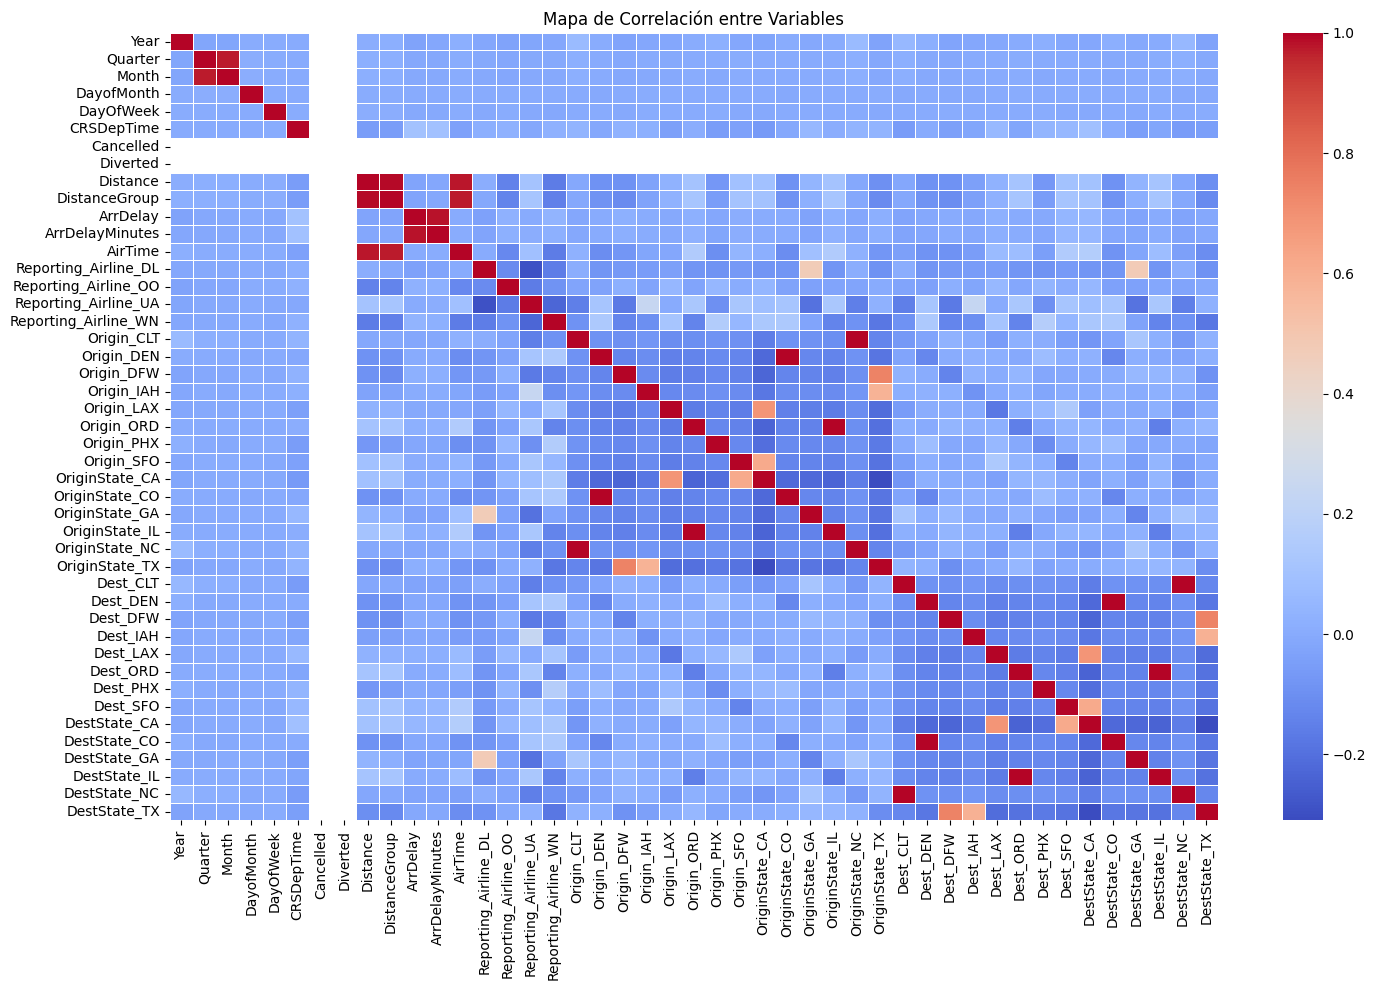

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
correlation_matrix = X_encoded.corr()

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación entre Variables")
plt.tight_layout()
plt.show()

In [13]:
print("Matriz de Confusión:")
print(conf_matrix)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"KS: {ks:.4f}")

Matriz de Confusión:
[[38659     0]
 [    0 10409]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
KS: 1.0000


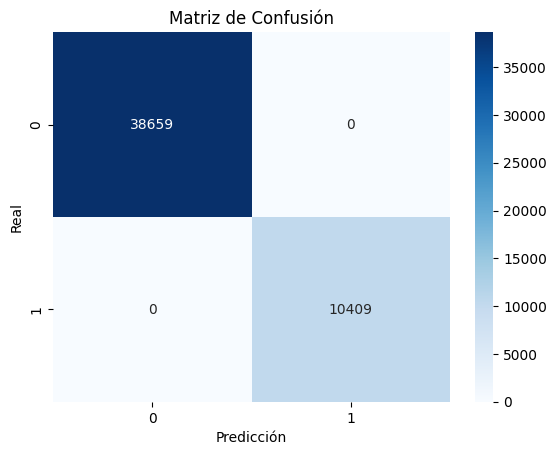

In [14]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

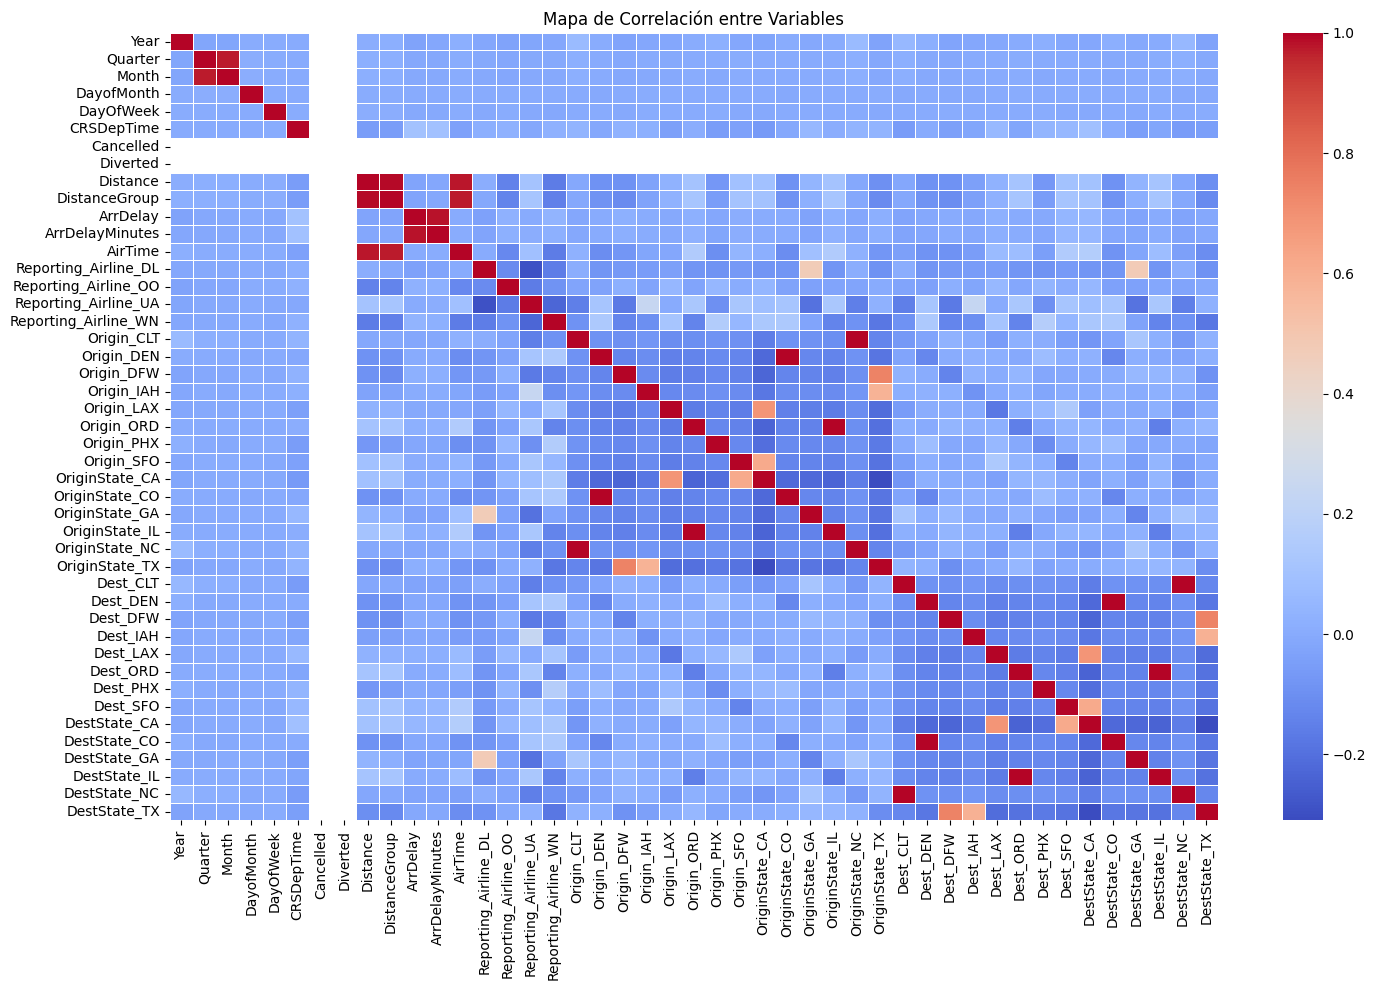

Matriz de Confusión:
 [[38659     0]
 [    0 10409]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
KS: 1.0000


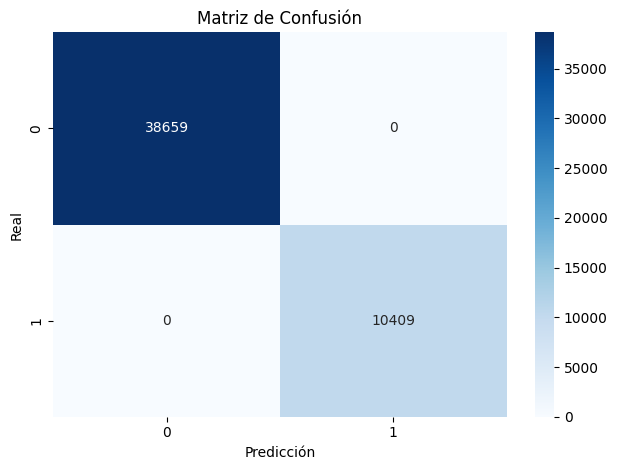

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar dataset
df = pd.read_csv("dataset_vuelos.csv")

# Eliminar columna no predictiva
if 'FlightDate' in df.columns:
    df = df.drop(columns=['FlightDate'])

# Separar variables predictoras y variable objetivo
target = 'is_delay'
X = df.drop(columns=[target])
y = df[target]

# ============================
# FILTRAR COLUMNAS CATEGÓRICAS
# ============================
# Elegir solo las columnas con menos de 100 categorías únicas
cat_cols = [col for col in X.select_dtypes(include='object').columns if X[col].nunique() <= 100]

# Realizar OneHotEncoding solo para estas columnas
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype=int)

# ============================
# HEATMAP DE CORRELACIÓN
# ============================
plt.figure(figsize=(15, 10))
correlation_matrix = X_encoded.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación entre Variables")
plt.tight_layout()
plt.show()

# ============================
# DIVISIÓN TRAIN/TEST
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# ============================
# MODELO DE REGRESIÓN LOGÍSTICA
# ============================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ============================
# PREDICCIÓN Y EVALUACIÓN
# ============================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluación
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ks = max(tpr - fpr)

# Mostrar resultados
print("Matriz de Confusión:\n", conf_matrix)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"KS: {ks:.4f}")

# Visualización de la matriz
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()